- [x] Analyze the age distribution of customers, and identify any trends or patterns in spending behavior, credit limit, and utilization ratio across different age groups.
- [x] Explore differences in spending patterns, credit limits, and utilization ratios between male and female customers.
- [ ] Investigate if the number of dependents influences spending behavior, credit limit, and utilization ratio.
- [ ] Determine if there's a relationship between customers' education levels and their spending behavior, credit limit, and utilization ratio.
- [ ] Assess if marital status has an impact on spending patterns, credit limits, and utilization ratios.
- [ ] Examine how income levels affect spending behavior, credit limit, and utilization ratio.
- [ ] Investigate if card types are associated with specific demographic segments, and how they may influence spending behavior, credit limit, and utilization ratio.

Consider visualizations such as bar charts, pie charts, or histograms to present the data and reveal trends within each demographic segment.


In [3]:
import sys
!conda install --yes --quiet --prefix {sys.prefix} \
numpy \
pandas \
matplotlib \
seaborn

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Exploration

In [16]:
FIG_SIZE = (7, 4)

def scatterplot(df, x, y):
    sns.scatterplot(x=x, y=y, data=df)
    plt.title(f'{x} vs. {y}')
    plt.show()
    
def boxplot(df, x, y):
    sns.boxplot(x=x, y=y, data=df)
    plt.title(f'{y} by {x}')
    plt.show()

def histplot(df, x, hue=None):
    plt.figure(figsize=FIG_SIZE)
    sns.histplot(data=df, x=x, hue=hue, element='step', fill=True)
    plt.title(f'Histogram of {x}')
    plt.xlabel(x)
    plt.ylabel('Num of samples')
    plt.show()

def density_plot(df, x, hue=None):
    plt.figure(figsize=FIG_SIZE)
    sns.kdeplot(data=df, x=x, hue=hue, shade=True, alpha=0.8)
    plt.title(f'Distribution of {x} by {hue}')
    plt.xlabel(x)
    plt.ylabel('Density')
    plt.show()
    
def pie_chart(data, labels):
    colors = sns.color_palette('pastel')[0:5]
    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    plt.show()

In [9]:
df = pd.read_csv('./data/BankChurners.csv')
column_renames = {
    'CLIENTNUM': 'client_id',
    'Attrition_Flag': 'churn_status',
    'Customer_Age': 'age',
    'Gender': 'gender',
    'Dependent_count': 'dependents',
    'Education_Level': 'education_level',
    'Marital_Status': 'marital_status',
    'Income_Category': 'income_category',
    'Card_Category': 'card_category',
    'Months_on_book': 'months_on_book',
    'Total_Relationship_Count': 'total_relationships',
    'Months_Inactive_12_mon': 'months_inactive',
    'Contacts_Count_12_mon': 'contacts',
    'Credit_Limit': 'credit_limit',
    'Total_Revolving_Bal': 'revolving_balance',
    'Avg_Open_To_Buy': 'available_credit',
    'Total_Amt_Chng_Q4_Q1': 'change_in_purchase_amt',
    'Total_Trans_Amt': 'total_purchase_amt',
    'Total_Trans_Ct': 'total_purchase_ct',
    'Total_Ct_Chng_Q4_Q1': 'change_in_purchase_ct',
    'Avg_Utilization_Ratio': 'credit_utilization',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'naive_bayes_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'naive_bayes_2'
}


In [12]:
# Standardize column names
df = df.rename(columns=column_renames)
df.columns

Index(['client_id', 'churn_status', 'age', 'gender', 'dependents',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationships', 'months_inactive', 'contacts',
       'credit_limit', 'revolving_balance', 'available_credit',
       'change_in_purchase_amt', 'total_purchase_amt', 'total_purchase_ct',
       'change_in_purchase_ct', 'credit_utilization', 'naive_bayes_1',
       'naive_bayes_2'],
      dtype='object')

In [13]:
print("Min age: ", df['age'].min())
print("Max age: ", df['age'].max())

Min age:  26
Max age:  73


In [14]:
bins = [26, 35, 60, 73]
labels = ['26-35', '36-60', '60-73']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

(1) Analyze the age distribution of customers, \
(2) and identify any trends or patterns in: \
(2.1) spending behavior \
(2.2) credit limit \
(2.3) utilization ratio across different age groups

Age groups are defined by common life stages: (0-18), college students & recent graduates (18-25), young professionals (25-35), middle-aged individuals (35-60), and retirees (60+)

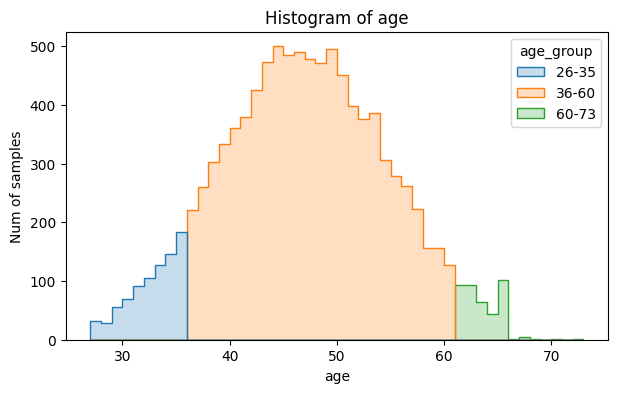

In [17]:
# (1)
histplot(df=df, x='age', hue='age_group')

In [18]:
df['age'].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: age, dtype: float64

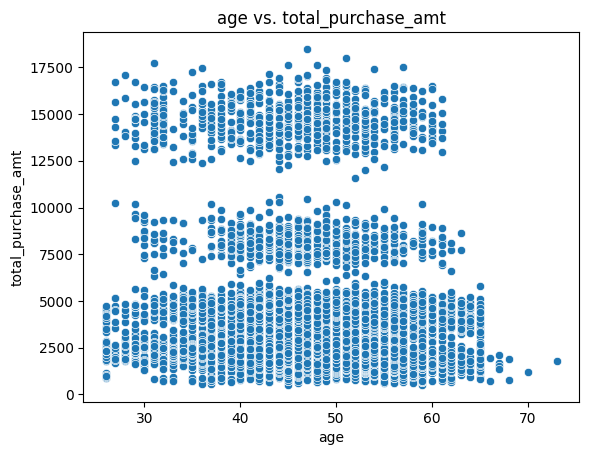

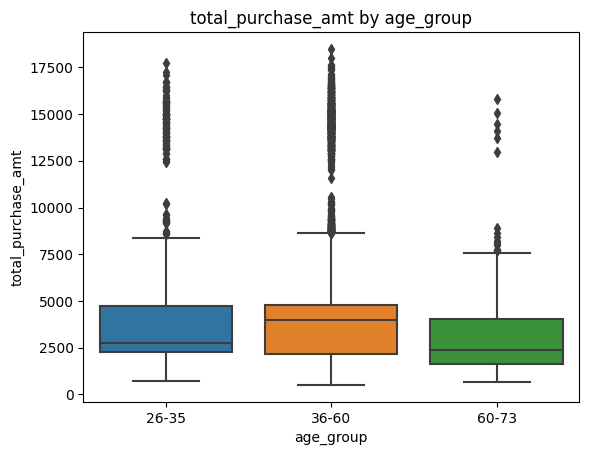

In [19]:
# (2.1) Spending behavior
# scatter plot: correlation between age and spending behavior
scatterplot(x='age', y='total_purchase_amt', df=df)

# Boxplot: outliers or significant differences in spending behavior between age groups
boxplot(x='age_group', y='total_purchase_amt', df=df)

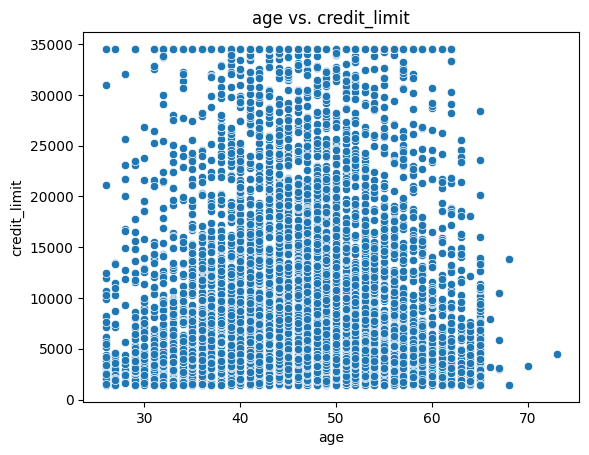

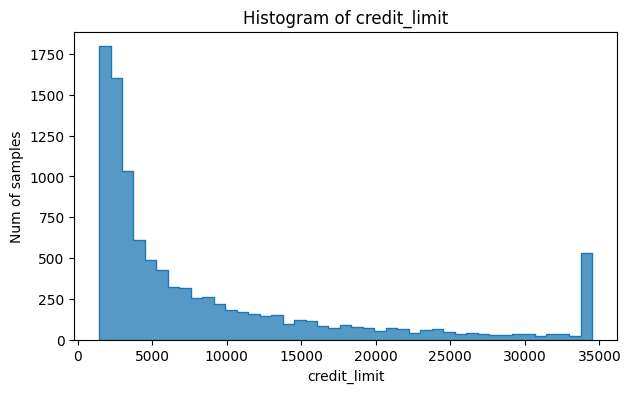

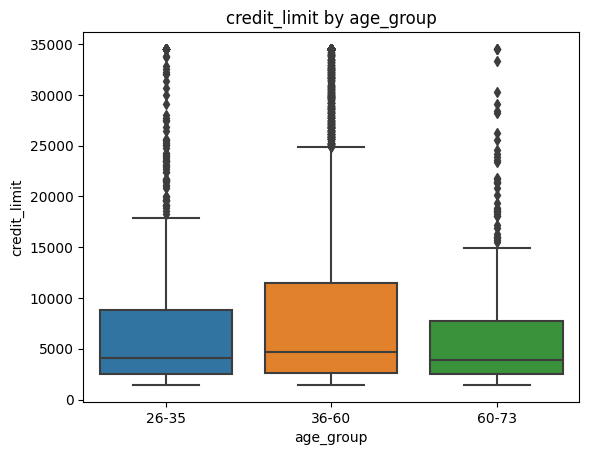

In [20]:
# (2.2) Credit limit
# scatter plot: correlation between age and credit_limit
scatterplot(x='age', y='credit_limit', df=df)

# Histogram: distribution of credit limits across all customers
histplot(df=df, x='credit_limit')

# Boxplot: outliers or significant differences in credit limit between age groups
boxplot(df=df, x='age_group', y='credit_limit')

In [109]:
# TODO: investigate what is causing these outliers. Could it be just a trend? If so, why is it true for all age groups?

(3) Explore differences in: \
(3.1)spending patterns \
(3.2) credit limits \
(3.3) and utilization ratios between male and female customers

In [21]:
# Filter the data to include only male and female customers
print("Genders: ", list(df['gender'].unique()))
male_df = df[df['gender'] == 'M']
female_df = df[df['gender'] == 'F']

# Compare spending patterns between male and female customers
male_spending = male_df['total_purchase_amt']
female_spending = female_df['total_purchase_amt']

print('Male spending stats:\n', male_spending.describe())
print()
print('Female spending stats:\n', female_spending.describe())

Genders:  ['M', 'F']
Male spending stats:
 count     4769.000000
mean      4493.706228
std       3835.315345
min        530.000000
25%       1881.000000
50%       3513.000000
75%       4711.000000
max      18484.000000
Name: total_purchase_amt, dtype: float64

Female spending stats:
 count     5358.000000
mean      4324.318216
std       2951.002887
min        510.000000
25%       2424.250000
50%       4134.000000
75%       4751.750000
max      17437.000000
Name: total_purchase_amt, dtype: float64


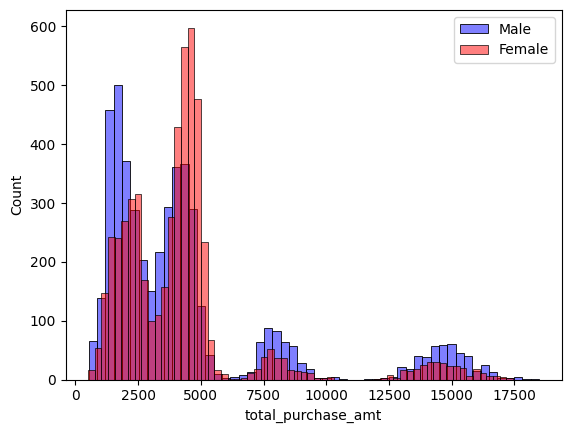

In [22]:
# Visualize differences in spending patterns between male and female customers
sns.histplot(data=male_df, x='total_purchase_amt', color='blue', alpha=0.5, label='Male')
sns.histplot(data=female_df, x='total_purchase_amt', color='red', alpha=0.5, label='Female')
plt.legend()
plt.show()

In [23]:
# Compare credit limits between male and female customers
male_credit_limit = male_df['credit_limit']
female_credit_limit = female_df['credit_limit']

print('Male credit limit stats:\n', male_credit_limit.describe())
print('Female credit limit stats:\n', female_credit_limit.describe())

Male credit limit stats:
 count     4769.000000
mean     12685.674963
std      10647.936985
min       1438.300000
25%       3805.000000
50%       8902.000000
75%      19040.000000
max      34516.000000
Name: credit_limit, dtype: float64
Female credit limit stats:
 count     5358.000000
mean      5023.854274
std       5251.881090
min       1438.300000
25%       2160.000000
50%       3048.000000
75%       5638.500000
max      34516.000000
Name: credit_limit, dtype: float64


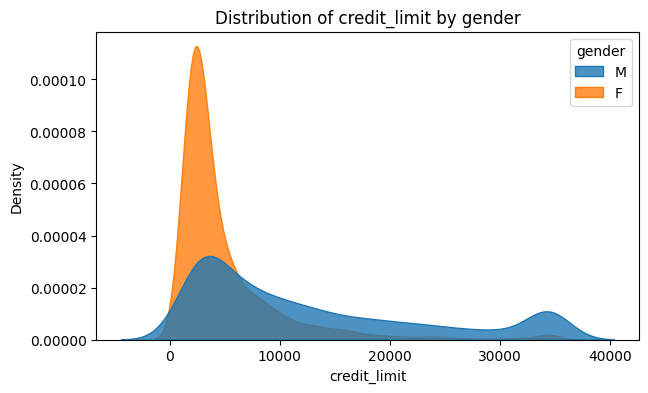

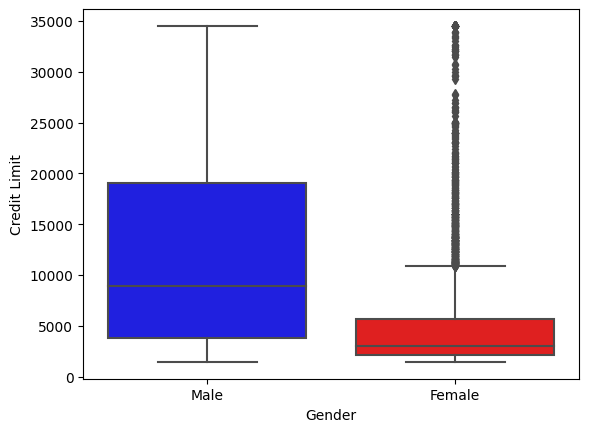

In [24]:
# Visualize differences in credit limits between male and female customers
density_plot(df=df, x='credit_limit', hue='gender')

sns.boxplot(data=[male_credit_limit, female_credit_limit], palette=['blue', 'red'])
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Credit Limit')
plt.show()

In [25]:
# Compare utilization ratios between male and female customers
male_utilization = male_df['credit_utilization']
female_utilization = female_df['credit_utilization']

print('Male utilization stats:\n', male_utilization.describe())
print('Female utilization stats:\n', female_utilization.describe())

Male utilization stats:
 count    4769.000000
mean        0.199548
std         0.232450
min         0.000000
25%         0.027000
50%         0.100000
75%         0.297000
max         0.994000
Name: credit_utilization, dtype: float64
Female utilization stats:
 count    5358.000000
mean        0.341957
std         0.293300
min         0.000000
25%         0.000000
50%         0.304000
75%         0.602000
max         0.999000
Name: credit_utilization, dtype: float64


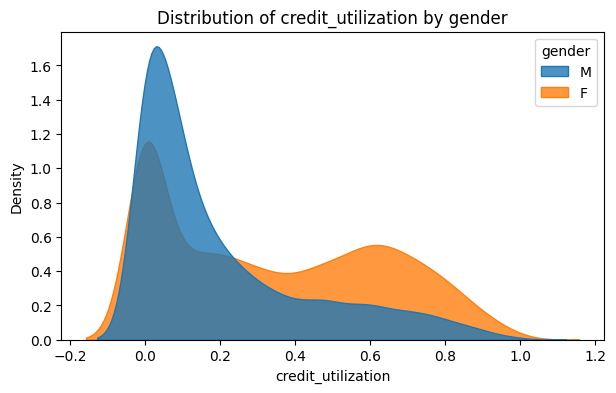

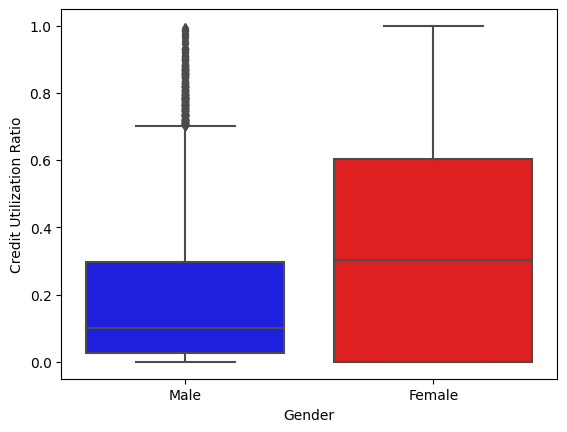

In [26]:
# Visualize differences in utilization ratios between male and female customers
density_plot(df=df, x='credit_utilization', hue='gender')

sns.boxplot(data=[male_utilization, female_utilization], palette=['blue', 'red'])
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Credit Utilization Ratio')
plt.show()

## Data Cleaning and Preprocessing

## Modelling

## Results and Interpretation

## Conclusions